In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [8]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.9780298 ,  0.31436529,  0.33633356, -0.99797223, -0.85307194,
        0.60474176, -0.12460107, -0.11442217, -0.82596855,  0.89221927])

In [9]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([-0.41067869, -0.86924767,  0.14992112,  0.46929807, -0.28134329,
       -0.90541343,  0.10230485, -0.59968565,  0.82181954,  0.78653045])

In [14]:
y = 0.3 * x1 + 0.5 * x2 + 0.1

y = (y > 0 ).astype('int')


print(y.shape)
y[0:10]

(100,)


array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

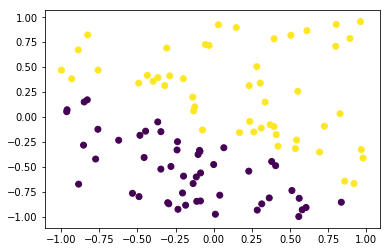

In [15]:
plt.scatter(x1, x2, c=y)

## Define Sigmoid 

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]
[  4.53978687e-05   6.82792246e-05   1.02692018e-04   1.54446212e-04
   2.32277160e-04   3.49316192e-04   5.25297471e-04   7.89865942e-04
   1.18752721e-03   1.78503502e-03   2.68237328e-03   4.02898336e-03
   6.04752187e-03   9.06814944e-03   1.35769169e-02   2.02816018e-02
   3.01959054e-02   4.47353464e-02   6.58005831e-02   9.5790466

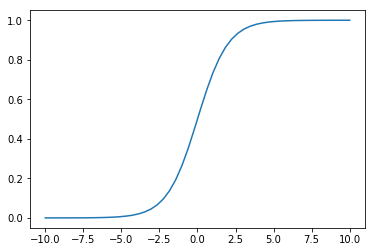

In [34]:
def sigmoid(n):
    return 1 / (1+np.exp(-n))

xx= np.linspace(start= -10 , stop= +10)
yy = sigmoid(xx)

print(xx)
print(yy)
plt.plot(xx,yy)



### Gradient Descent

In [33]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    
    predict = ( y_predict > 0.5 ).astype('int') ## 0 or 1으로 표기하기 위해 
    accuracy = ( predict == y).mean()
    
    print("{0:2}  accuracy = {1:.6f}  ".format(epoch,accuracy))
    
    #error = np.abs(y_predict - y).mean()
    
    if accuracy >= 0.95:
        break;
    
#     if epoch % 10 == 0:
#         print("{0:2} error = {1:.6f}".format(epoch, error))
    
#     if error < 0.001:
#         break

    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b  = b - learning_rate * (y_predict - y).mean()

print("----" * 10)
print("w1 = {0:.6f}, w2 = {1:.6f} b = {2:.6f}".format(w1, w2, b))
print("{0:2} error = {1:.6f}".format(epoch, error))

 0  accuracy = 0.500000  
 1  accuracy = 0.500000  
 2  accuracy = 0.640000  
 3  accuracy = 0.830000  
 4  accuracy = 0.950000  
----------------------------------------
w1 = 0.495484, w2 = 0.717877 b = 0.221775
 4 error = 0.149607


In [9]:
import pandas as pd

y_predict = w1 * x1 + w2 * x2 + b

result = pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': y_predict})

result

,x1,x2,y(actual),y(predict)
0,-0.664281,-0.800106,-0.499337,-0.497635
1,0.888323,0.879832,0.806413,0.804517
2,-0.685105,0.330242,0.059590,0.058993
3,-0.040228,-0.765704,-0.294920,-0.293359
4,-0.260070,-0.937228,-0.446635,-0.444699
5,-0.026892,-0.660852,-0.238494,-0.237148
6,0.394135,-0.142781,0.146850,0.147093
7,-0.925223,0.875639,0.260253,0.258572
8,0.585400,-0.374704,0.088268,0.088961
9,0.103523,0.027320,0.144717,0.144647
